In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
ls -lh /gpfs/fs1/scratch/cchen/archive/TAU_run4/atm/hist/offline


total 2.8G
-rw-r--r-- 1 cchen ncar 904M May  1 15:37 TAU_run4.cam.h0.0001-01.nc
-rw-r--r-- 1 cchen ncar 904M May  1 15:43 TAU_run4.cam.h0.0001-02.nc
-rw-r--r-- 1 cchen ncar 1.1G May  1 15:43 TAU_run4.cam.h1.0001-01-01-00000.nc


In [2]:
ds = xr.open_dataset("/gpfs/fs1/scratch/cchen/archive/TAU_run4/atm/hist/offline/TAU_run4.cam.h1.0001-01-01-00000.nc", decode_times=False)

In [32]:
ds

<xarray.Dataset>
Dimensions:       (ilev: 33, lat: 192, lev: 32, lon: 288, nbnd: 2, time: 7)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 ...
  * lon           (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 ...
  * lev           (lev) float64 3.643 7.595 14.36 24.61 35.92 43.19 51.68 ...
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 29.73 39.27 47.11 ...
  * time          (time) float64 0.0 5.125 10.25 15.38 20.5 25.62 30.75
Dimensions without coordinates: nbnd
Data variables:
    gw            (lat) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    date          (time) int32 ...
    datesec       (time) int32 ...
    time_bnds     (time, nbnd) float64 ...
    date_written  (time) |S8 ...
    time_written  (time) |S8 ...
    ndbase        int32 ...
    nsbase        int32 ...
    nbdate 

In [26]:
ds2 = xr.open_dataset("/gpfs/fs1/scratch/cchen/archive/TAU_run2/atm/hist/TAU_run2.cam.h1.0001-01-01-00000.nc", decode_times=False)

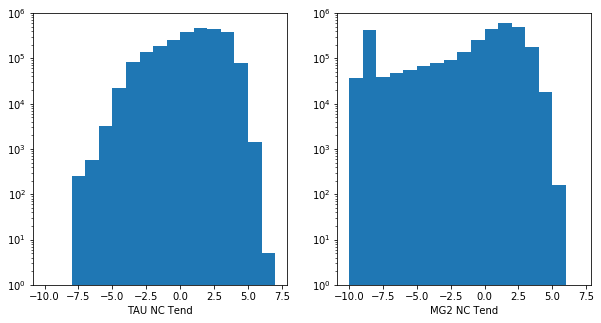

In [20]:
plt.figure(figsize=(10, 5))
bins = np.arange(-10, 8)
plt.subplot(1, 2, 1)
nc_vals_tau = ds["nctend_TAU"].values.ravel()
plt.hist(np.log10(-nc_vals_tau[-nc_vals_tau > 0]), bins=bins)
plt.xlabel("TAU NC Tend")
plt.gca().set_yscale("log")
plt.ylim(1, 1e6)
plt.subplot(1, 2, 2)
nc_vals_mg = ds["nctend_MG2"].values.ravel()
plt.hist(np.log10(-nc_vals_mg[nc_vals_mg < 0]), bins=bins)
plt.xlabel("MG2 NC Tend")
plt.gca().set_yscale("log")
plt.ylim(1, 1e6)

plt.savefig("run4_off_nc_hist.png", dpi=200, bbox_inches="tight")

(array([[          nan,           nan,           nan, ...,           nan,
                   nan, 1.0000000e+00],
        [          nan,           nan,           nan, ...,           nan,
                   nan,           nan],
        [          nan,           nan,           nan, ...,           nan,
                   nan,           nan],
        ...,
        [          nan,           nan,           nan, ..., 1.2650000e+03,
         4.8400000e+02, 5.8400000e+02],
        [          nan,           nan,           nan, ..., 4.0790000e+03,
         9.1790000e+03, 8.5400000e+03],
        [          nan,           nan,           nan, ..., 2.8490000e+03,
         1.5216000e+04, 2.1180885e+07]]),
 array([-1824471.4  , -1806226.6  , -1787982.   , -1769737.2  ,
        -1751492.5  , -1733247.8  , -1715003.1  , -1696758.4  ,
        -1678513.6  , -1660269.   , -1642024.2  , -1623779.5  ,
        -1605534.8  , -1587290.1  , -1569045.4  , -1550800.6  ,
        -1532556.   , -1514311.2  , -1496066.

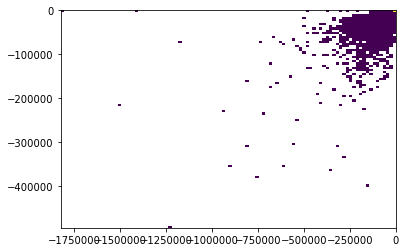

In [29]:
plt.hist2d(nc_vals_tau, nc_vals_mg, bins=100, cmin=1)

In [25]:
print("TAU NC==0:", np.count_nonzero(nc_vals_tau == 0))
print("MG  NC==0:", np.count_nonzero(nc_vals_mg == 0))

TAU NC==0: 18779998
MG  NC==0: 18097612


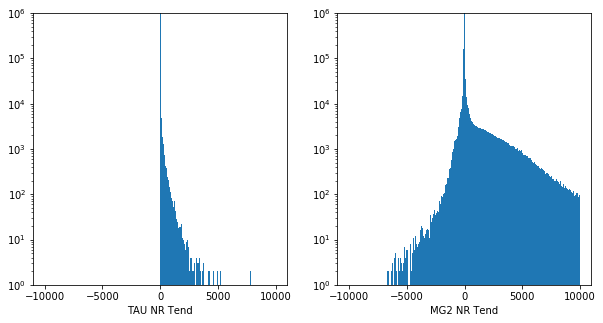

In [12]:
plt.figure(figsize=(10, 5))
bins = np.arange(-10000, 10000, 50)
plt.subplot(1, 2, 1)
nr_vals_tau = ds["nrtend_TAU"].values.ravel()
plt.hist(nr_vals_tau, bins=bins)
plt.xlabel("TAU NR Tend")
plt.gca().set_yscale("log")
plt.ylim(1, 1e6)
plt.subplot(1, 2, 2)
nr_vals_mg = ds["nrtend_MG2"].values.ravel()
plt.hist(nr_vals_mg, bins=bins)
plt.xlabel("MG2 NR Tend")
plt.gca().set_yscale("log")
plt.ylim(1, 1e6)

plt.savefig("run4_off_nr_hist.png", dpi=200, bbox_inches="tight")

In [19]:
nr_vals_mg.min()

-8372.226

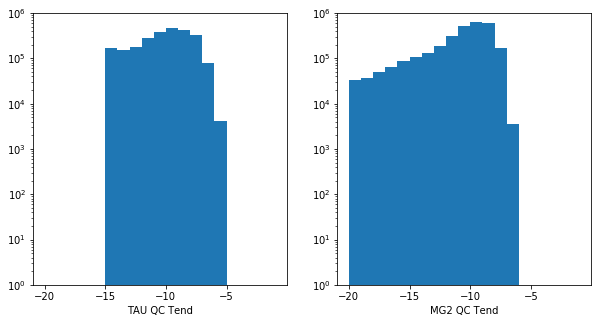

In [13]:
plt.figure(figsize=(10, 5))
bins = np.arange(-20, 0)
plt.subplot(1, 2, 1)
qc_vals_tau = ds["qctend_TAU"].values.ravel()
plt.hist(np.log10(-qc_vals_tau[-qc_vals_tau > 0]), bins=bins)
plt.xlabel("TAU QC Tend")
plt.gca().set_yscale("log")
plt.ylim(1, 1e6)
plt.subplot(1, 2, 2)
qc_vals_mg = ds["qctend_MG2"].values.ravel()
plt.hist(np.log10(-qc_vals_mg[qc_vals_mg < 0]), bins=bins)
plt.xlabel("MG2 QC Tend")
plt.gca().set_yscale("log")
plt.ylim(1, 1e6)

plt.savefig("run4_off_qc_hist.png", dpi=200, bbox_inches="tight")

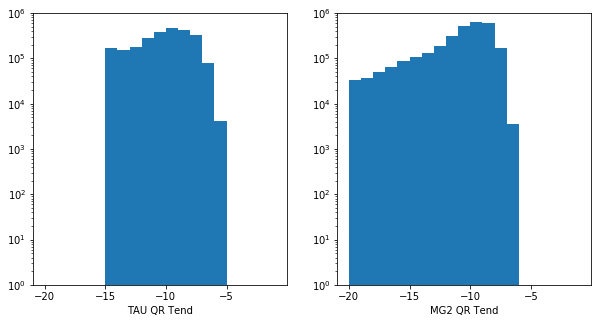

In [14]:
plt.figure(figsize=(10, 5))
bins = np.arange(-20, 0)
plt.subplot(1, 2, 1)
qc_vals_tau = ds["qrtend_TAU"].values.ravel()
plt.hist(np.log10(qc_vals_tau[qc_vals_tau > 0]), bins=bins)
plt.xlabel("TAU QR Tend")
plt.gca().set_yscale("log")
plt.ylim(1, 1e6)
plt.subplot(1, 2, 2)
qc_vals_mg = ds["qrtend_MG2"].values.ravel()
plt.hist(np.log10(qc_vals_mg[qc_vals_mg > 0]), bins=bins)
plt.xlabel("MG2 QR Tend")
plt.gca().set_yscale("log")
plt.ylim(1, 1e6)

plt.savefig("run4_off_qr_hist.png", dpi=200, bbox_inches="tight")

In [37]:
ds["QC_TAU_in"].min()

<xarray.DataArray 'QC_TAU_in' ()>
array(0., dtype=float32)

In [24]:
ds2

<xarray.Dataset>
Dimensions:       (ilev: 33, lat: 192, lev: 32, lon: 288, nbnd: 2, time: 30)
Coordinates:
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 -86.23 -85.29 ...
  * lon           (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 ...
  * lev           (lev) float64 3.643 7.595 14.36 24.61 35.92 43.19 51.68 ...
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 29.73 39.27 47.11 ...
  * time          (time) object 0001-01-01 00:00:00 0001-01-06 03:00:00 ...
Dimensions without coordinates: nbnd
Data variables:
    gw            (lat) float64 ...
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    P0            float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    date          (time) int32 ...
    datesec       (time) int32 ...
    time_bnds     (time, nbnd) float64 ...
    date_written  (time) |S8 ...
    time_written  (time) |S8 ...
    ndbase        int32 ...
    nsbase        int32 ...
    nb

/glade/work/dgagne/ncar_pylib_dl/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/glade/work/dgagne/ncar_pylib_dl/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


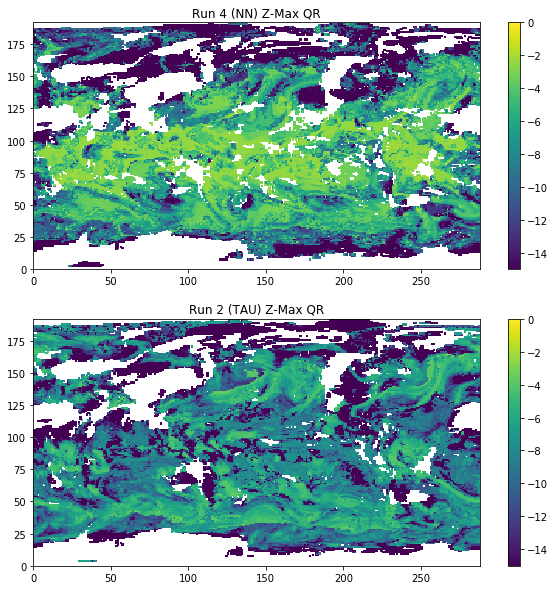

In [23]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.pcolormesh(np.ma.array(np.log10(ds["QR_TAU_in"].values[5][-1]), mask=ds["QR_TAU_in"].values[0].max(axis=0)< 1e-15), vmin=-15, vmax=0)
plt.title("Run 4 (NN) Z-Max QR")
plt.colorbar()
plt.subplot(2, 1, 2)
plt.pcolormesh(np.ma.array(np.log10(ds2["QR_TAU_in"].values[5][-1]), mask=ds2["QR_TAU_in"].values[0].max(axis=0)< 1e-15), vmin=-15, vmax=0)
plt.title("Run 2 (TAU) Z-Max QR")
plt.colorbar()
plt.savefig("run4_run2_qr_map.png", dpi=200, bbox_inches="tight")

In [45]:
np.log10(ds["QR_TAU_in"].values[0].max(axis=0)).max()

/glade/work/dgagne/ncar_pylib_dl/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


-0.36029273

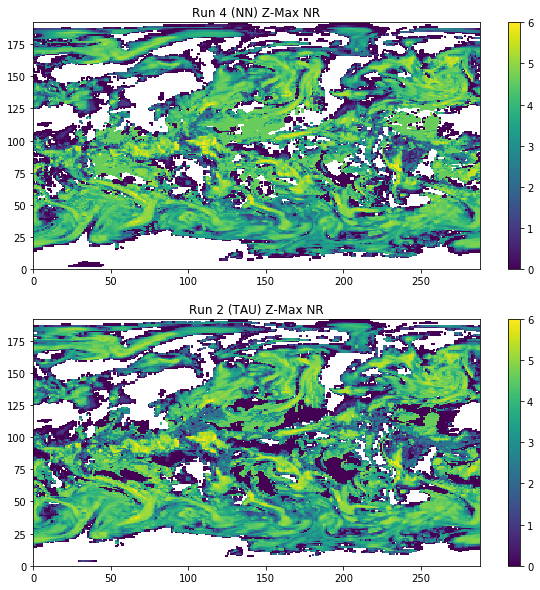

In [61]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
plt.pcolormesh(np.ma.array(np.log10(ds["NR_TAU_in"].values[5].max(axis=0)), mask=ds["QR_TAU_in"].values[0].max(axis=0)< 1e-15), vmin=0, vmax=6)
plt.title("Run 4 (NN) Z-Max NR")
plt.colorbar()
plt.subplot(2, 1, 2)
plt.pcolormesh(np.ma.array(np.log10(ds2["NR_TAU_in"].values[0].max(axis=0)), mask=ds2["QR_TAU_in"].values[0].max(axis=0)< 1e-15), vmin=0, vmax=6)
plt.title("Run 2 (TAU) Z-Max NR")
plt.colorbar()
plt.savefig("run4_run2_nr_map.png", dpi=200, bbox_inches="tight")

(array([2.29410e+04, 2.57840e+04, 2.87530e+04, 3.30100e+04, 3.71460e+04,
        4.11280e+04, 4.71940e+04, 5.26900e+04, 6.01750e+04, 7.34420e+04,
        9.30780e+04, 1.20432e+05, 1.54239e+05, 1.97768e+05, 2.50408e+05,
        2.97869e+05, 3.23444e+05, 3.07364e+05, 1.86956e+05, 3.13476e+05,
        1.20153e+05, 2.65410e+04, 5.86200e+03, 6.81000e+02, 7.60000e+01,
        2.20000e+01, 8.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([-18. , -17.5, -17. , -16.5, -16. , -15.5, -15. , -14.5, -14. ,
        -13.5, -13. , -12.5, -12. , -11.5, -11. , -10.5, -10. ,  -9.5,
         -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,  -5.5,  -5. ,
         -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,  -1. ,  -0.5]),
 <a list of 1 Patch objects>)

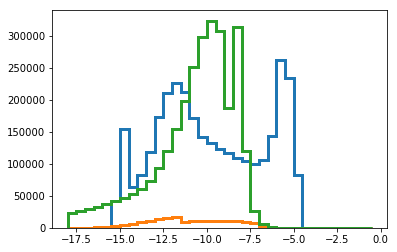

In [10]:
qrtend = ds["qrtend_TAU"].values.ravel()
qrtendm = ds["qrtend_MG2"].values.ravel()
qrtend2 = ds2["qrtend_TAU"][0].values.ravel()
qctend = ds["qctend_TAU"].values.ravel()
plt.hist(np.log10(qrtend[qrtend > 0]), bins=np.arange(-18, 0, 0.5), histtype="step", lw=3)
plt.hist(np.log10(qrtend2[qrtend2 > 0]), bins=np.arange(-18, 0, 0.5), histtype="step", lw=3)
plt.hist(np.log10(qrtendm[qrtendm > 0]),  bins=np.arange(-18, 0, 0.5), histtype="step", lw=3)
#plt.hist(np.log10(-qctend[qctend < 0]))

#plt.gca().set_yscale("log")